In [4]:
####################################################################################################

                    # Import all the things

####################################################################################################

import re
from os import path
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageEnhance
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
from io import BytesIO
import datetime
import random
import wikipedia

####################################################################################################

                    # Import default stopwords to then add on to

####################################################################################################


stopwords = set(STOPWORDS)
stopwords.add('us')
stopwords.add('let')
stopwords.add('one')

stopwords.add('now')
stopwords.add('away')
stopwords.add('stop')
stopwords.add('the')
stopwords.add('no')
stopwords.add('see')
stopwords.add('camera')
stopwords.add('look')
stopwords.add('left')
stopwords.add('right')
stopwords.add('around')
stopwords.add('toward')
stopwords.add('over')
stopwords.add('behind')

stopwords.add('You')
stopwords.add('What')
stopwords.add('Got')
stopwords.add('got')
stopwords.add('Sir')
stopwords.add('Look')
stopwords.add("We're")
stopwords.add('oh')
stopwords.add('going')
stopwords.add("'ve")
stopwords.add("will")
stopwords.add("well")

stopwords.add('Yes')
stopwords.add('yes')
stopwords.add('Hi')
stopwords.add('hi')
stopwords.add("'m'")
stopwords.add("I'm")
stopwords.add("ll")



####################################################################################################

                    # Define the functions to scrape the scripts
                    # and create the word cloud

####################################################################################################

def getcorpus_wiki(Title):
    soup = BeautifulSoup(wikipedia.WikipediaPage(title = Title).content, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words

def getcorpus_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words

def getcorpus_local(local):
    with open(str(local)+'.txt') as f:
        soup = BeautifulSoup(f, "html.parser")
        words = soup.get_text()
        words= re.sub("[^a-zA-Z' ]+", " ", words)
        return words



####################################################################################################

                    # Nebulize = turn into a cloud

####################################################################################################

def nebulize(text, imgloc, imgurl,maxsize ,
               maxwords, save, title, color, font, 
              figsize, fontsize):
    if imgloc == "local":
        mask = np.array(Image.open(imgurl))
    else:
        response1 = requests.get(imgurl)
        img = Image.open(BytesIO(response1.content))
        mask = np.array(img)
    wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\\' +str(font)+'.ttf', 
                          stopwords = stopwords, background_color="white",
                          max_words=maxwords,max_font_size=maxsize,  mask=mask, 
                          collocation_threshold=150).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[figsize,figsize])
    plt.title(title, size=fontsize)
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    elif color =="green":
        plt.imshow(wordcloud.recolor(color_func=green_func), interpolation="bilinear")
    elif color =="red":
        plt.imshow(wordcloud.recolor(color_func=red_func), interpolation="bilinear")
    elif color =="orange":
        plt.imshow(wordcloud.recolor(color_func=orange_func), interpolation="bilinear")
    elif color =="yellow":
        plt.imshow(wordcloud.recolor(color_func=yellow_func), interpolation="bilinear")
    elif color == "teal":
        plt.imshow(wordcloud.recolor(color_func=teal_func), interpolation="bilinear")
    elif color == "lightblue":
        plt.imshow(wordcloud.recolor(color_func=lightblue_func), interpolation="bilinear")
    elif color =='darkblue':
        plt.imshow(wordcloud.recolor(color_func=darkblue_func), interpolation="bilinear")
    elif color == "purple":
        plt.imshow(wordcloud.recolor(color_func=purple_func), interpolation="bilinear")
    elif color =="pink":
        plt.imshow(wordcloud.recolor(color_func=pink_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    
    plt.show()


In [5]:
####################################################################################################

                    # Custom color palettes because why not

####################################################################################################


def green_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(87, 154), random.randint(0, 100) ,random.randint(0, 92))


def random_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 357), random.randint(0, 100) ,random.randint(0, 92))


def red_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 6), random.randint(0, 100) ,random.randint(0, 92))




def orange_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(14, 38), random.randint(0, 100) ,random.randint(0, 92))




def yellow_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(39, 69), random.randint(0, 100) ,random.randint(0, 92))


def teal_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(147, 180), random.randint(0, 100) ,random.randint(0, 92))


def lightblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(180, 200), random.randint(0, 100) ,random.randint(0, 92))


def darkblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(208, 250), random.randint(0, 100) ,random.randint(0, 92))




def purple_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(256, 283), random.randint(0, 100) ,random.randint(0, 92))


def pink_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(293, 341), random.randint(0, 100) ,random.randint(0, 92))


In [6]:

ENG = getcorpus_url('http://www.script-o-rama.com/movie_scripts/e/emperors-new-groove-script-transcript.html')

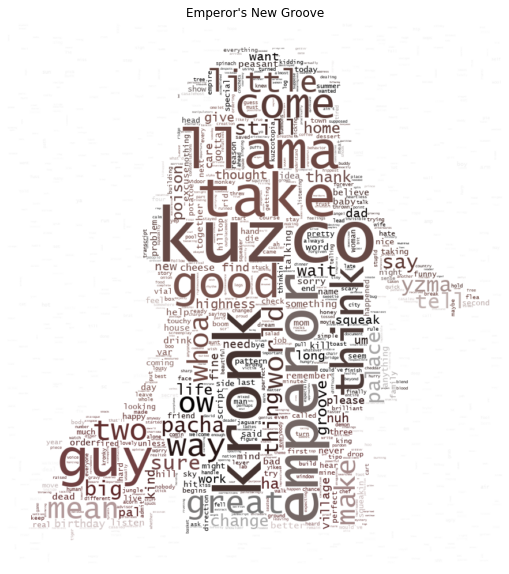

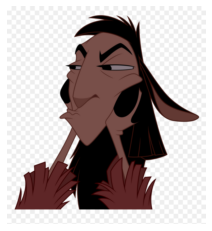

In [17]:
nebulize(ENG.lower(), "url", 
            "https://www.vhv.rs/dpng/d/307-3073446_kuzco-llama-hd-png-download.png",
           500, 7000, "yes", "Emperor's New Groove", "image","lucon" , 10, 12 )

In [16]:
stopwords.add("know")
stopwords.add("yeah")
stopwords.add("back")
stopwords.add("okay")
stopwords.add("gonna")
stopwords.add("really")
stopwords.add("go")
stopwords.add("hey")
stopwords.add("uh")
stopwords.add("huh")
stopwords.add("time")

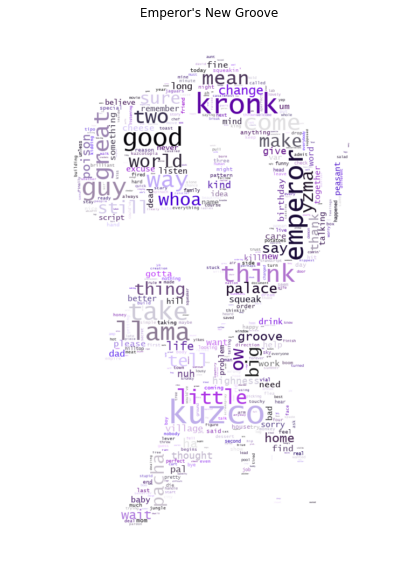

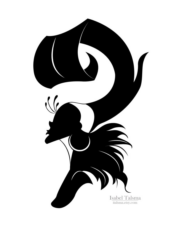

In [18]:
nebulize(ENG.lower(), "url", 
            "https://i.pinimg.com/originals/ef/a4/35/efa4356d48b09dba3b61425542c20497.jpg",
           500, 7000, "yes", "Emperor's New Groove", "purple","lucon" , 10, 12 )

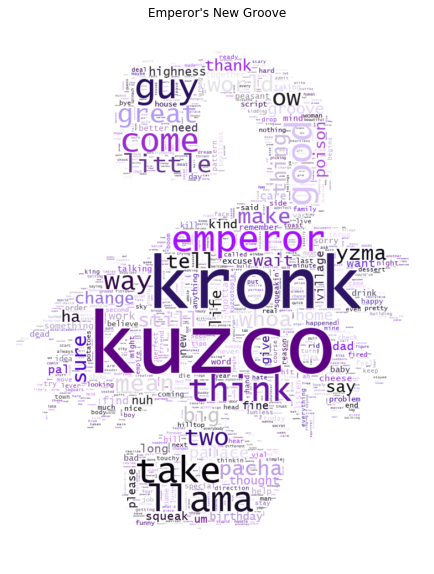

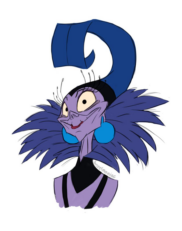

In [21]:
nebulize(ENG.lower(), "url", 
            "https://i.pinimg.com/originals/9b/9b/6b/9b9b6b4d4c2b4577f8689d54963899d8.jpg",
           500, 7000, "yes", "Emperor's New Groove", "purple","lucon" , 10, 12 )